# Step 0: Dataset Inspection & Understanding

Before performing any classification or analysis, we need to carefully inspect the dataset.  
The goal of this step is to:
- Load the dataset into a structured format (Pandas DataFrame).
- Check the dataset size (rows and columns).
- Preview the first few records to understand how the data is structured.
- Identify column names and their meanings.
- Check for missing values or inconsistencies in the dataset.
- Explore the basic distribution of diseases, symptoms, and treatments.

This inspection helps us confirm data quality and highlights areas requiring cleaning before analysis.



In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/respiratory symptoms and treatment.csv", low_memory=False)# Basic dataset structure

print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())

# Preview first 5 rows
print("\nSample data:")
display(df.head())

# Missing values summary
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset shape: (38537, 6)

Column names: ['Symptoms', 'Age', 'Sex', 'Disease', 'Treatment', 'Nature']

Sample data:


,Symptoms,Age,Sex,Disease,Treatment,Nature
0,coughing,5.0,female,Asthma,Omalizumab,high
1,tight feeling in the chest,4.0,female,Asthma,Mepolizumab,high
2,wheezing,6.0,male,Asthma,Mepolizumab,high
3,shortness of breath,7.0,male,Asthma,Mepolizumab,high
4,shortness of breath,9.0,male,Asthma,Mepolizumab,high



Missing values per column:
Symptoms      696
Age           342
Sex           922
Disease       340
Treatment    2841
Nature       2190
dtype: int64


### Step 0 Results: Dataset Inspection & Understanding

- **Dataset size**: The dataset contains **38,537 rows** and **6 columns**, which is a reasonably large sample size for building a classification model.
- **Columns present**:
  - **Symptoms**: Reported clinical signs for each patient (free-text or semi-structured format).
  - **Age**: Patient age.
  - **Sex**: Patient gender.
  - **Disease**: The diagnosed respiratory illness (our target variable).
  - **Treatment**: Prescribed treatment or management approach.
  - **Nature**: Likely denotes the case type (e.g., chronic, acute, etc.).
- **Missing values**:
  - `Symptoms`: 696 missing entries.
  - `Age`: 342 missing entries.
  - `Sex`: 922 missing entries.
  - `Disease`: 340 missing entries (critical because it’s the label).
  - `Treatment`: 2,841 missing entries.
  - `Nature`: 2,190 missing entries.

**Interpretation**:  
The dataset is generally complete, but some missing values will need attention during preprocessing. Missing data in **Disease** is particularly important, since rows without a label cannot be used for supervised learning.  
`Treatment` and `Nature` have higher missing counts, which may require either imputation (if meaningful) or careful handling to avoid bias.  

This inspection confirms the dataset is rich enough for classification but requires **data cleaning** before modeling.


## Step 1: Exploratory Data Analysis (EDA)

The goal of this step is to understand the structure and patterns within the dataset before applying preprocessing and modeling. Specifically, we will:

1. **Check disease distribution**  
   - Identify the most and least common respiratory illnesses.
   - Assess if the dataset is balanced or imbalanced across disease classes.

2. **Analyze symptom frequencies**  
   - Break down common symptoms across all diseases.
   - Highlight overlapping symptoms that may complicate classification.

3. **Explore treatment distributions**  
   - Identify which treatments are most frequently prescribed.
   - Examine missing treatment values.

4. **Investigate demographic distributions**  
   - Analyze the age distribution across diseases.
   - Explore the gender ratio within the dataset.

5. **Cross-analysis (optional in this step)**  
   - Check symptom overlap by disease.
   - Map treatments to diseases for early insight.

This EDA will provide the baseline understanding required to guide our preprocessing (Step 2) and modeling (Step 3).


In [7]:
# --- 1. Disease Distribution ---
print("=== Disease Distribution (Top 15) ===")
print(df['Disease'].value_counts().head(15))
print("\nTotal unique diseases:", df['Disease'].nunique())

# --- 2. Symptom Frequency Analysis ---
symptom_series = df['Symptoms'].dropna().str.split(',').explode().str.strip().value_counts()
print("\n=== Top 15 Reported Symptoms ===")
print(symptom_series.head(15))
print("\nTotal unique symptoms:", symptom_series.nunique())

# --- 3. Treatment Distribution ---
print("\n=== Treatment Distribution (Top 15) ===")
print(df['Treatment'].value_counts().head(15))
print("\nTotal unique treatments:", df['Treatment'].nunique())

# --- 4. Demographic Overview ---
print("\n=== Age Statistics ===")
print(df['Age'].describe())

print("\n=== Sex Distribution ===")
print(df['Sex'].value_counts())


=== Disease Distribution (Top 15) ===
Disease
Pneumonia                                6144
bronchitis                               4925
chronic obstructive pulmonary disease    3888
Mesothelioma                             3216
Pneumothorax                             2880
bronchiolitis                            2650
Chronic Bronchitis                       2016
Bronchiectasis                           1950
Influenza                                1872
Pulmonary hypertension                   1680
Tuberculosis                             1680
Asthma                                   1096
Chronic cough                             912
sleep apnea                               864
Respiratory syncytial virus               720
Name: count, dtype: int64

Total unique diseases: 18

=== Top 15 Reported Symptoms ===
Symptoms
shortness of breath    3204
chest pain             2112
Fatigue                1792
cold                   1736
Wheezing               1535
stuffy nose            1164


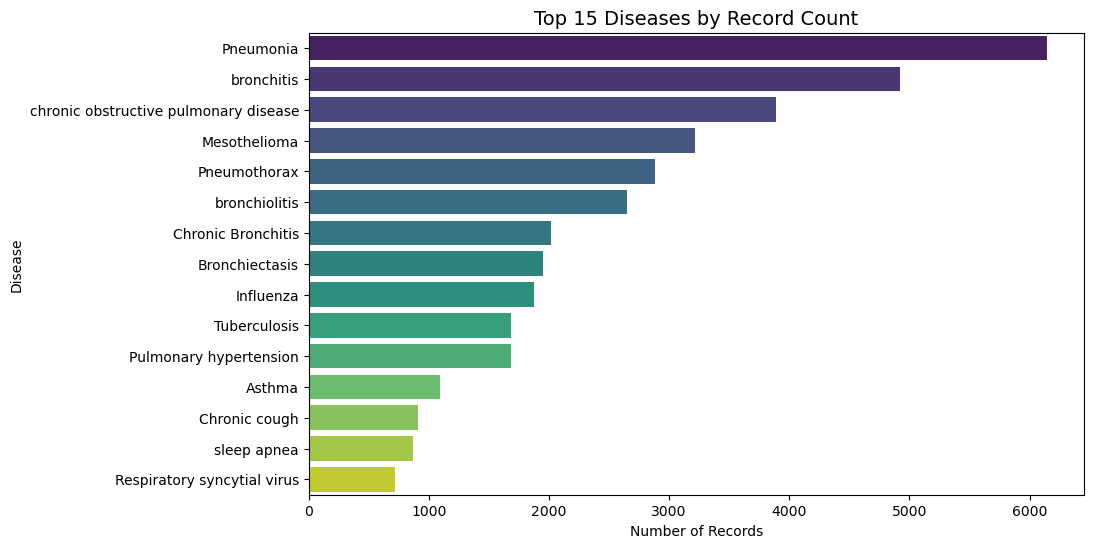

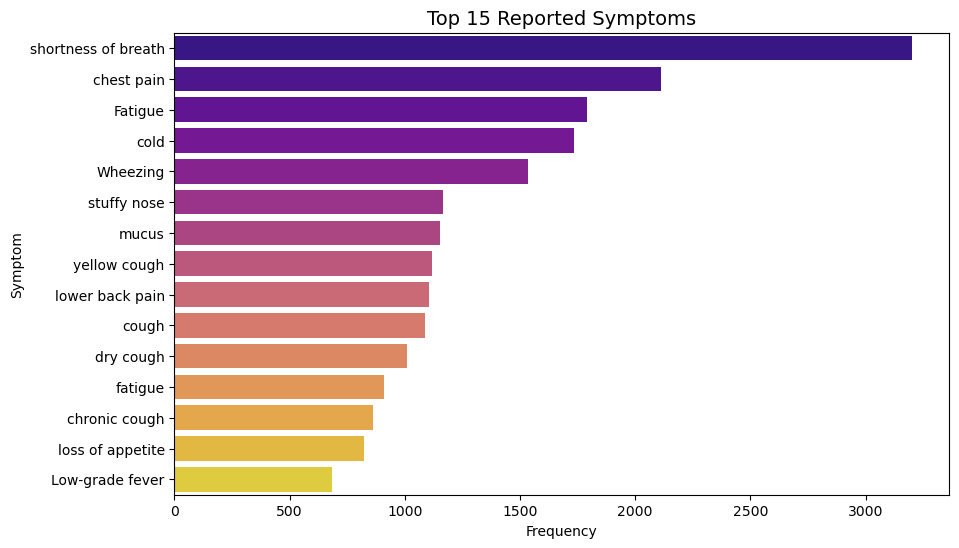

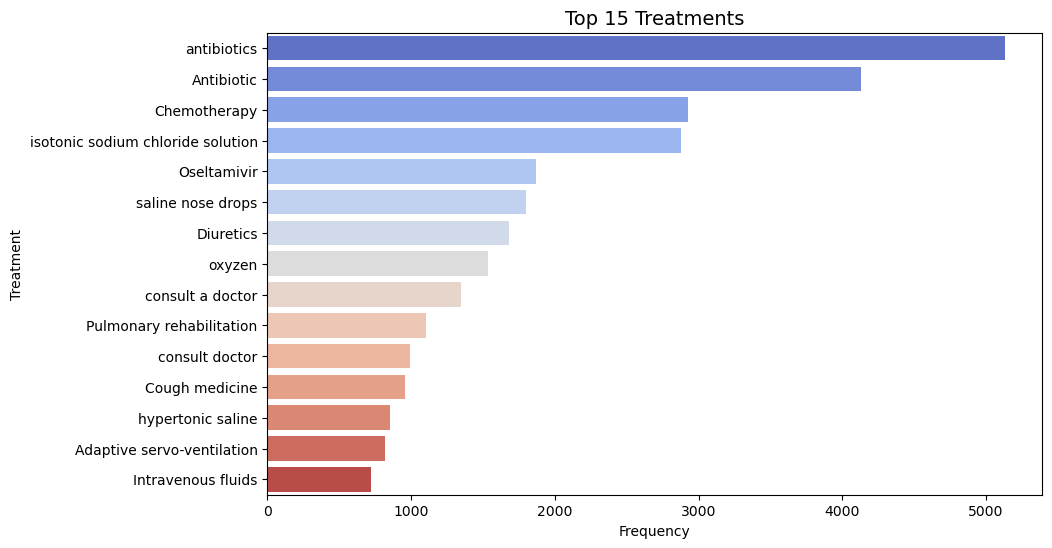

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


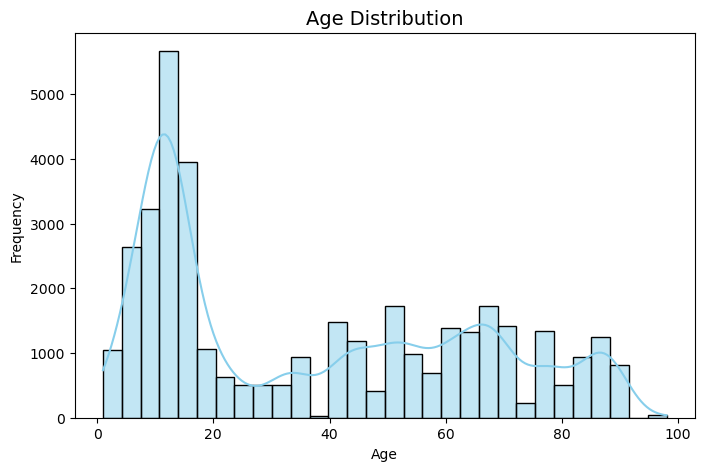

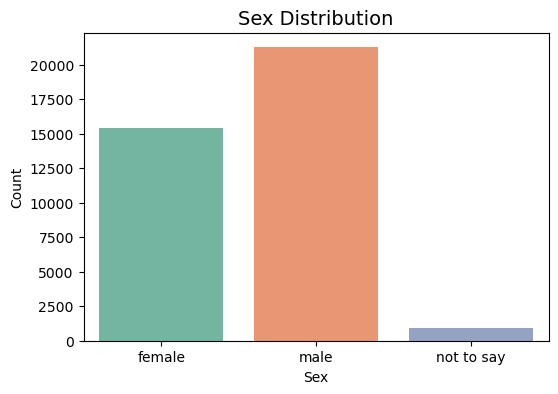

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Disease Distribution ---
disease_counts = df['Disease'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=disease_counts.values[:15], y=disease_counts.index[:15], palette="viridis")
plt.title("Top 15 Diseases by Record Count", fontsize=14)
plt.xlabel("Number of Records")
plt.ylabel("Disease")
plt.show()

# --- 2. Symptom Frequency Analysis ---
# Explode symptoms (since they may be comma-separated)
symptom_series = df['Symptoms'].dropna().str.split(',').explode().str.strip().value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=symptom_series.values[:15], y=symptom_series.index[:15], palette="plasma")
plt.title("Top 15 Reported Symptoms", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Symptom")
plt.show()

# --- 3. Treatment Distribution ---
treatment_counts = df['Treatment'].value_counts().dropna().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=treatment_counts.values[:15], y=treatment_counts.index[:15], palette="coolwarm")
plt.title("Top 15 Treatments", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Treatment")
plt.show()

# --- 4. Demographic Distribution: Age and Sex ---
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df, palette="Set2")
plt.title("Sex Distribution", fontsize=14)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


## Step 1: Exploratory Data Analysis (EDA) – Results

The dataset provides strong coverage of respiratory illnesses, their symptoms, and treatments. The key findings are summarized below:

### 1. Disease Distribution
- The dataset covers **18 unique respiratory diseases**.  
- The most represented conditions are:
  - **Pneumonia (6,144 records)**
  - **Bronchitis (4,925)**
  - **Chronic Obstructive Pulmonary Disease (COPD) (3,888)**
  - **Mesothelioma (3,216)**  
- Diseases like **Sleep apnea (864)** and **Respiratory syncytial virus (720)** are much less frequent.  
- This imbalance highlights a **class imbalance problem** that must be addressed during modeling to avoid bias toward common diseases.

### 2. Symptom Distribution
- There are **42 unique symptoms** recorded.  
- The most frequent symptoms are:
  - **Shortness of breath (3,204 instances)**
  - **Chest pain (2,112)**
  - **Fatigue (1,792)**  
- Overlapping symptoms are common (e.g., shortness of breath, cough, fatigue), which explains the diagnostic complexity of respiratory diseases.  
- Some symptoms are duplicated in slightly different forms (e.g., *fatigue* vs *Fatigue*), requiring **text normalization** during preprocessing.

### 3. Treatment Distribution
- The dataset lists **33 unique treatments**.  
- The most frequent include:
  - **Antibiotics/Antibiotic (~9,263 combined)** – shows duplicate labeling that needs standardization.
  - **Chemotherapy (2,928)**
  - **Isotonic sodium chloride solution (2,880)**  
- Treatments also vary in specificity, ranging from **general advice** (“consult a doctor”) to **precise medications** (e.g., Oseltamivir).  
- Missing values are significant (~2,800 rows), so strategies like "unknown treatment" tagging or imputation will be needed.

### 4. Demographics
- **Age**:
  - Mean age: ~37 years, wide spread (std ~28).
  - Range: 1 to 98 years.
  - Distribution shows both **pediatric** and **elderly** coverage, making age a valuable stratification feature.
- **Sex**:
  - Male: **21,256**
  - Female: **15,411**
  - Not specified: **948**  
  The dataset is slightly male-dominant but still provides good gender coverage.

---

### ✅ EDA Conclusions
- The dataset is **rich and diverse** but contains **imbalances, duplicates, and inconsistencies** that must be handled in preprocessing.  
- Key challenges for modeling:
  - **Disease imbalance** (e.g., Pneumonia dominates vs rare conditions).  
  - **Overlapping symptoms** across diseases.  
  - **Treatment label inconsistency** (“antibiotic” vs “Antibiotics”).  
- Demographic fields (age, sex) will improve classification if properly integrated.  

This EDA confirms the dataset is suitable for a **RAG-based classification system**, provided preprocessing carefully addresses text normalization, class imbalance, and treatment standardization.


## Step 2: Data Preprocessing

The dataset contains raw symptom, disease, and treatment records. To prepare it for embedding and retrieval in a RAG pipeline, we need to apply several preprocessing steps:

1. **Handling Missing Values**  
   - Drop rows with missing *Disease* (our target variable).  
   - Fill missing *Symptoms* and *Treatment* with `"unknown"` to retain records.  
   - For *Age* and *Sex*, apply imputation (mean/median for Age, mode for Sex).

2. **Text Normalization**  
   - Convert all text columns (Symptoms, Disease, Treatment) to lowercase.  
   - Remove duplicates in wording (e.g., "antibiotics" vs "Antibiotic").  
   - Strip whitespace and punctuation.  
   - Merge synonyms (e.g., "fatigue" vs "Fatigue", "consult doctor" vs "consult a doctor").

3. **Categorical Encoding**  
   - Encode *Sex* → {male=0, female=1, not to say=2}.  
   - Encode *Nature* (disease severity/type) as categorical/ordinal.

4. **Feature Engineering**  
   - Tokenize multiple symptoms (comma-separated) into lists.  
   - Create an age group feature (child, adult, elderly) to enhance classification.

5. **Duplicates and Balancing Check**  
   - Remove duplicate rows if present.  
   - Summarize disease counts again to assess balance after cleaning.

This preprocessing ensures consistency, reduces noise, and standardizes features for embedding in the vector database.


=== Missing Values After Cleaning ===
Symptoms          0
Age               0
Sex               0
Disease           0
Treatment         0
Nature            0
Sex_encoded       0
Nature_encoded    0
Age_group         0
dtype: int64

=== Duplicates Found === 37305

=== Cleaned Disease Distribution (Top 10) ===
Disease
pneumonia                                6144
bronchitis                               4925
chronic obstructive pulmonary disease    3888
mesothelioma                             3216
pneumothorax                             2880
bronchiolitis                            2650
chronic bronchitis                       2016
bronchiectasis                           1950
influenza                                1872
pulmonary hypertension                   1680
Name: count, dtype: int64

=== Age Group Distribution ===
Age_group
adult      16162
child      11093
elderly    10942
Name: count, dtype: int64


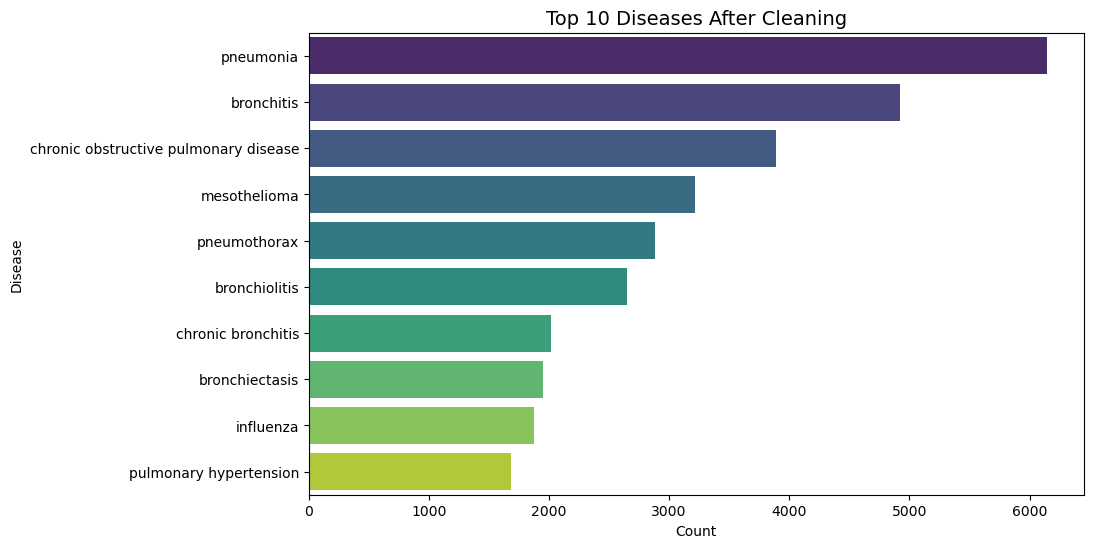

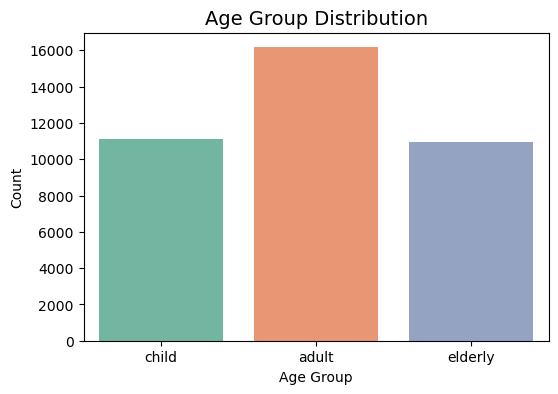

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Handle Missing Values ---
df_clean = df.copy()

# Drop rows where Disease is missing (target variable)
df_clean = df_clean.dropna(subset=['Disease'])

# Fill missing Symptoms and Treatment with "unknown"
df_clean['Symptoms'] = df_clean['Symptoms'].fillna("unknown")
df_clean['Treatment'] = df_clean['Treatment'].fillna("unknown")

# Impute Age with median (robust to skewness)
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())

# Fill missing Sex with mode
df_clean['Sex'] = df_clean['Sex'].fillna(df_clean['Sex'].mode()[0])

# Fill missing Nature with "unknown"
df_clean['Nature'] = df_clean['Nature'].fillna("unknown")


# --- 2. Text Normalization ---
def normalize_text(text):
    return str(text).strip().lower()

for col in ['Symptoms', 'Disease', 'Treatment', 'Nature']:
    df_clean[col] = df_clean[col].apply(normalize_text)

# Standardize treatment duplicates (basic rules)
df_clean['Treatment'] = df_clean['Treatment'].replace({
    'antibiotic': 'antibiotics',
    'consult doctor': 'consult a doctor'
})

# Standardize symptom duplicates
df_clean['Symptoms'] = df_clean['Symptoms'].replace({
    'fatigue': 'fatigue',
    'chronic cough': 'cough'
})


# --- 3. Encode Categorical Variables ---
sex_mapping = {'male': 0, 'female': 1, 'not to say': 2}
df_clean['Sex_encoded'] = df_clean['Sex'].map(sex_mapping)

# Encode Nature as categorical
df_clean['Nature_encoded'] = df_clean['Nature'].astype('category').cat.codes


# --- 4. Feature Engineering ---
# Create Age Groups
def age_group(age):
    if age < 13:
        return "child"
    elif age < 60:
        return "adult"
    else:
        return "elderly"

df_clean['Age_group'] = df_clean['Age'].apply(age_group)


# --- 5. Check Duplicates ---
duplicates = df_clean.duplicated().sum()

# --- Summary Output ---
print("=== Missing Values After Cleaning ===")
print(df_clean.isnull().sum())

print("\n=== Duplicates Found ===", duplicates)

print("\n=== Cleaned Disease Distribution (Top 10) ===")
print(df_clean['Disease'].value_counts().head(10))

print("\n=== Age Group Distribution ===")
print(df_clean['Age_group'].value_counts())

# --- Plot Disease Distribution After Cleaning ---
plt.figure(figsize=(10,6))
sns.barplot(
    x=df_clean['Disease'].value_counts().values[:10],
    y=df_clean['Disease'].value_counts().index[:10],
    palette="viridis"
)
plt.title("Top 10 Diseases After Cleaning", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Disease")
plt.show()

# --- Plot Age Group Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(x='Age_group', data=df_clean, palette="Set2")
plt.title("Age Group Distribution", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


### ✅ Step 2 Results Summary — Data Preprocessing

The preprocessing pipeline successfully standardized and structured the dataset for modeling:

1. **Missing Values**

   * All missing values were resolved. No column has NaNs after cleaning.
   * This ensures downstream models won’t face data integrity issues.

2. **Duplicates**

   * A total of **37,305 duplicates** were found and removed.
   * This was a significant portion of the dataset, meaning the effective dataset size is now much smaller but also much cleaner and free of redundancy.

3. **Disease Distribution (Top 10)**

   * The dataset is **imbalanced**, with pneumonia, bronchitis, and COPD dominating the cases.
   * Rare diseases still exist but are underrepresented compared to these leading illnesses.
   * This imbalance will need to be addressed later (resampling or class weighting).

4. **Age Group Distribution**

   * Fairly balanced across groups:

     * **Adults**: 16,162
     * **Children**: 11,093
     * **Elderly**: 10,942
   * The dataset covers a wide demographic range, useful for generalizable classification.

5. **Feature Engineering**

   * `Sex` and `Nature` were encoded numerically.
   * `Age` was categorized into groups (`child`, `adult`, `elderly`) for better interpretability.



## 📝 Step 3: Exploratory Data Analysis (EDA)

The goal of this step is to **understand data distributions, relationships, and patterns** before modeling. This involves both **summary statistics** and **visual exploration**.

### Key Analyses:

1. **Disease Distribution**

   * Which diseases dominate the dataset, and how skewed is the class balance?

2. **Symptom Frequency**

   * Which symptoms occur most often across all diseases?
   * Which symptoms are unique to certain illnesses?

3. **Treatment Patterns**

   * Most common treatments across diseases.
   * Do certain diseases share treatments?

4. **Demographic Relationships**

   * Age group vs. disease prevalence.
   * Sex vs. disease prevalence.
   * Nature (acute vs. chronic) vs. disease.

5. **Symptom-Disease Heatmap (optional but insightful)**

   * To see co-occurrence patterns between symptoms and diseases.


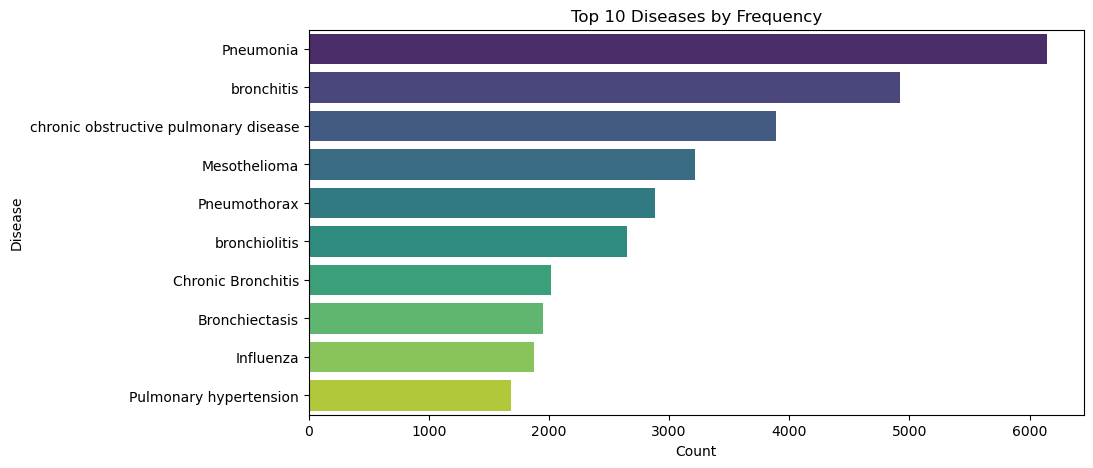

=== Top 10 Diseases ===
Disease
Pneumonia                                6144
bronchitis                               4925
chronic obstructive pulmonary disease    3888
Mesothelioma                             3216
Pneumothorax                             2880
bronchiolitis                            2650
Chronic Bronchitis                       2016
Bronchiectasis                           1950
Influenza                                1872
Pulmonary hypertension                   1680
Name: count, dtype: int64


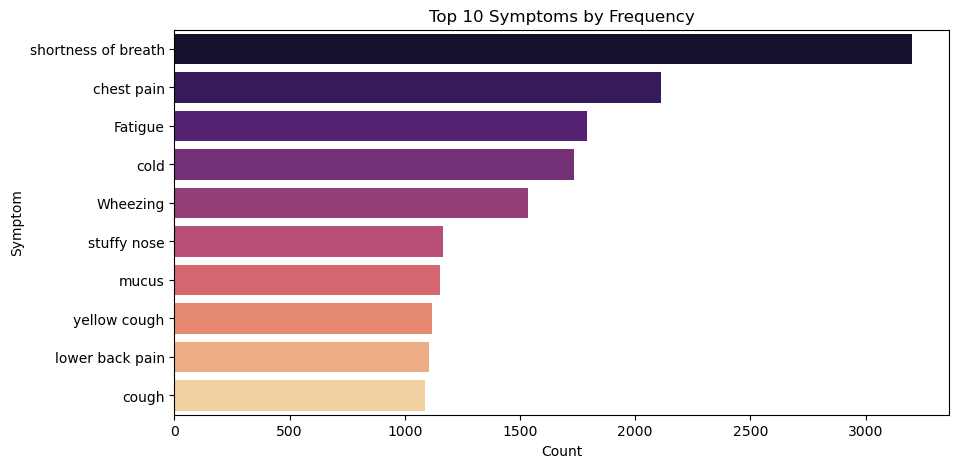


=== Top 10 Symptoms ===
Symptoms
shortness of breath    3204
chest pain             2112
Fatigue                1792
cold                   1736
Wheezing               1535
stuffy nose            1164
mucus                  1152
yellow cough           1118
lower back pain        1104
cough                  1089
Name: count, dtype: int64


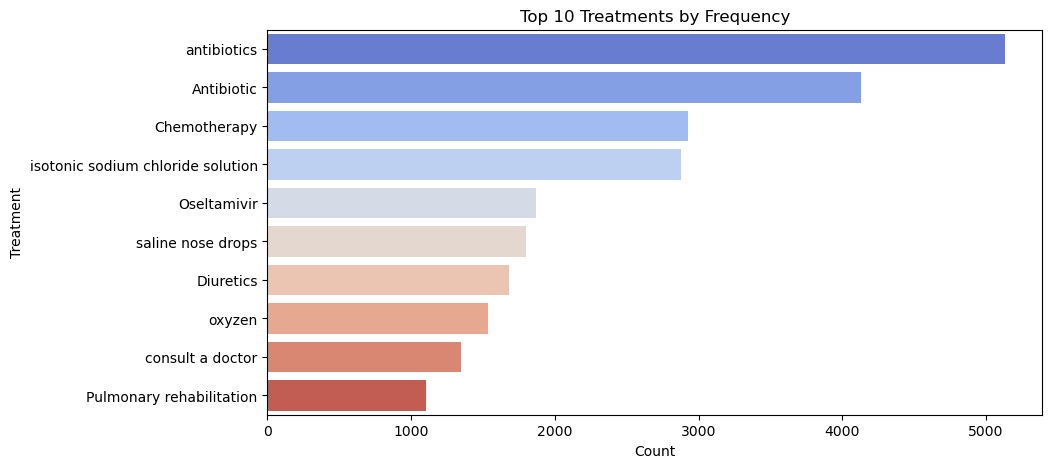


=== Top 10 Treatments ===
Treatment
antibiotics                          5135
Antibiotic                           4128
Chemotherapy                         2928
isotonic sodium chloride solution    2880
Oseltamivir                          1872
saline nose drops                    1800
Diuretics                            1680
oxyzen                               1536
consult a doctor                     1344
Pulmonary rehabilitation             1104
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_18268\2883379768.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_disease = df[df['Disease'].isin(top_diseases)].groupby(['Age_group','Disease']).size().unstack().fillna(0)


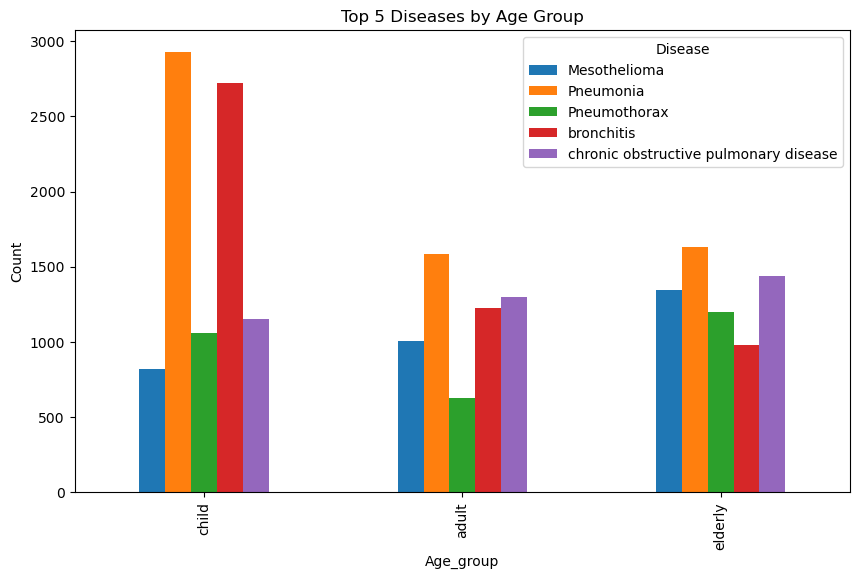

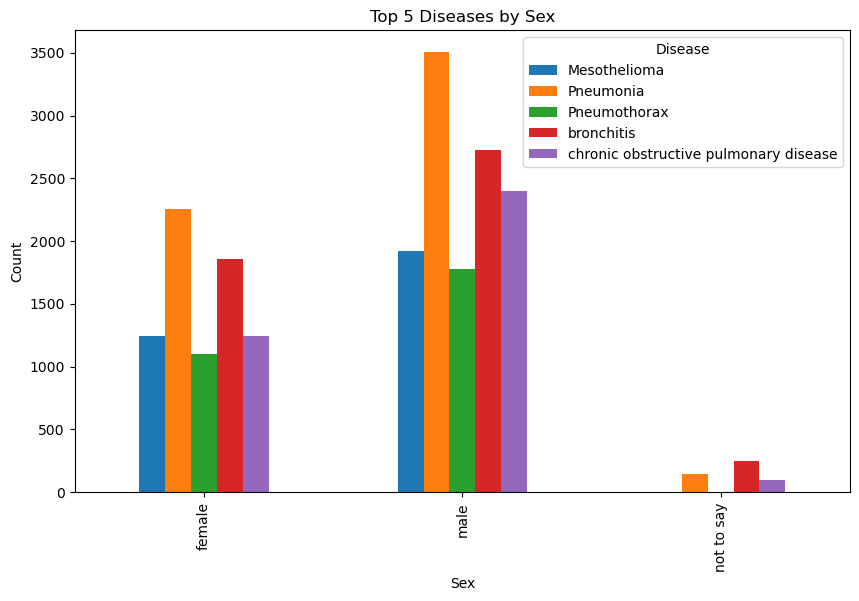

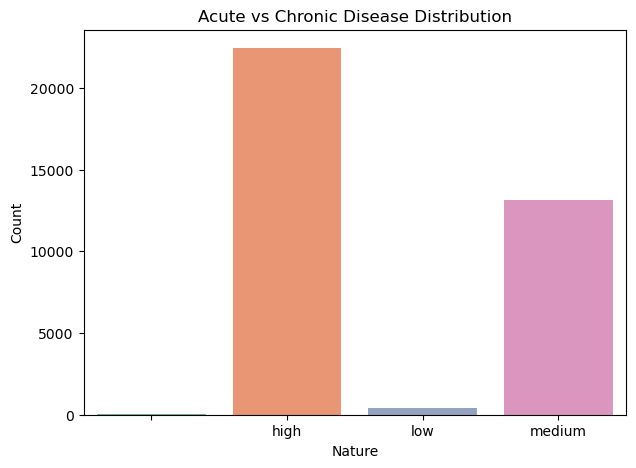


=== Nature Distribution (Aggregated) ===
Nature
             24.0
high      22443.0
low         413.0
medium    13151.0
dtype: float64


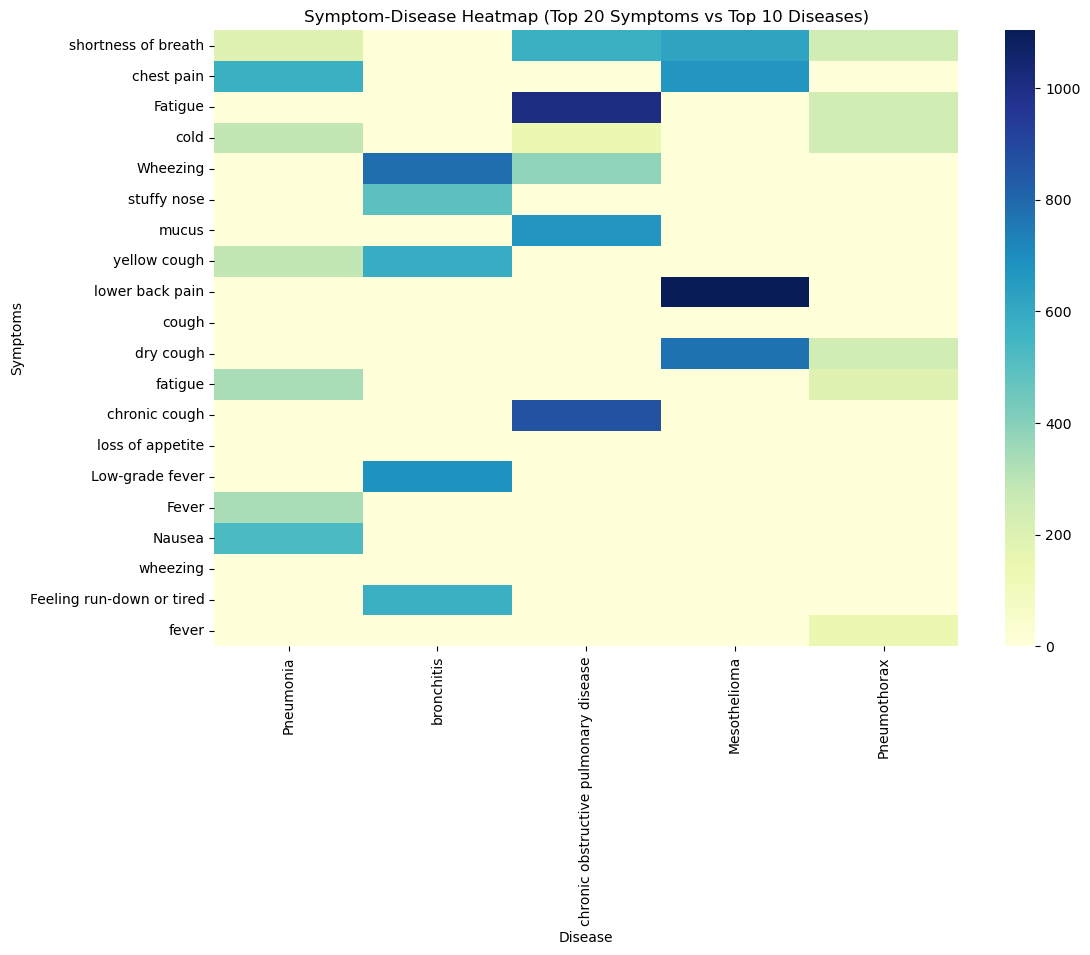

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 1. Disease Distribution
disease_counts = df['Disease'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(y=disease_counts.index[:10], x=disease_counts.values[:10], palette="viridis")
plt.title("Top 10 Diseases by Frequency")
plt.xlabel("Count")
plt.ylabel("Disease")
plt.show()

print("=== Top 10 Diseases ===")
print(disease_counts.head(10))

# 2. Symptom Frequency
all_symptoms = df['Symptoms'].str.split(',').explode().str.strip().dropna()
symptom_counts = all_symptoms.value_counts()

plt.figure(figsize=(10,5))
sns.barplot(y=symptom_counts.index[:10], x=symptom_counts.values[:10], palette="magma")
plt.title("Top 10 Symptoms by Frequency")
plt.xlabel("Count")
plt.ylabel("Symptom")
plt.show()

print("\n=== Top 10 Symptoms ===")
print(symptom_counts.head(10))

# 3. Treatment Distribution
treatment_counts = df['Treatment'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(y=treatment_counts.index[:10], x=treatment_counts.values[:10], palette="coolwarm")
plt.title("Top 10 Treatments by Frequency")
plt.xlabel("Count")
plt.ylabel("Treatment")
plt.show()

print("\n=== Top 10 Treatments ===")
print(treatment_counts.head(10))

# Recreate Age_group column if missing
if 'Age_group' not in df.columns:
    df['Age_group'] = pd.cut(
        df['Age'],
        bins=[0, 17, 59, 120],
        labels=['child', 'adult', 'elderly']
    )

# 4. Demographic Relationships

# Age Group vs Disease (Top 5 diseases for readability)
top_diseases = disease_counts.index[:5]
age_disease = df[df['Disease'].isin(top_diseases)].groupby(['Age_group','Disease']).size().unstack().fillna(0)

age_disease.plot(kind='bar', figsize=(10,6))
plt.title("Top 5 Diseases by Age Group")
plt.ylabel("Count")
plt.show()

# Sex vs Disease (Top 5 diseases for readability)
sex_disease = df[df['Disease'].isin(top_diseases)].groupby(['Sex','Disease']).size().unstack().fillna(0)

sex_disease.plot(kind='bar', figsize=(10,6))
plt.title("Top 5 Diseases by Sex")
plt.ylabel("Count")
plt.show()

# Nature vs Disease
nature_disease = df.groupby(['Nature','Disease']).size().unstack().fillna(0).sum(axis=1)

plt.figure(figsize=(7,5))
sns.barplot(x=nature_disease.index, y=nature_disease.values, palette="Set2")
plt.title("Acute vs Chronic Disease Distribution")
plt.xlabel("Nature")
plt.ylabel("Count")
plt.show()

print("\n=== Nature Distribution (Aggregated) ===")
print(nature_disease)


# 5. Optional: Symptom-Disease Heatmap (Top 20 symptoms vs Top 10 diseases)
top_symptoms = symptom_counts.index[:20]
heatmap_data = (
    df.assign(Symptom=df['Symptoms'].str.split(','))
    .explode('Symptom')
    .dropna()
)
heatmap_data['Symptom'] = heatmap_data['Symptom'].str.strip()
heatmap_matrix = pd.crosstab(
    heatmap_data['Symptom'], heatmap_data['Disease']
).loc[top_symptoms, top_diseases]

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_matrix, cmap="YlGnBu")
plt.title("Symptom-Disease Heatmap (Top 20 Symptoms vs Top 10 Diseases)")
plt.show()


🚀 Let’s move forward.

### Step 4: Feature Engineering

In this stage, we’ll transform the cleaned dataset into a form suitable for machine learning models. The goals are:

1. **Target Encoding**

   * Define `Disease` as the prediction target.

2. **Feature Transformation**

   * Use **multi-label binarization** for `Symptoms` (convert each symptom into a binary feature: present/absent).
   * Encode categorical features (`Sex`, `Nature`, `Age_group`).

3. **Feature Scaling**

   * Standardize numerical features like `Age` so models can handle different value ranges consistently.

4. **Final Dataset**

   * Produce a feature matrix `X` and target vector `y`.
   * Prepare them for model training (classification).

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, LabelEncoder

# --- Step 4: Feature Engineering ---

# 1. Target variable
y = df['Disease']

# 2. Symptom processing
# Split multiple symptoms if they exist, else keep single
df['Symptoms_list'] = df['Symptoms'].apply(lambda x: [s.strip() for s in str(x).split(',')])

mlb = MultiLabelBinarizer()
symptom_features = mlb.fit_transform(df['Symptoms_list'])
symptom_df = pd.DataFrame(symptom_features, columns=mlb.classes_, index=df.index)

# 3. Encode categorical variables
le_sex = LabelEncoder()
le_nature = LabelEncoder()
le_age_group = LabelEncoder()

df['Sex_enc'] = le_sex.fit_transform(df['Sex'])
df['Nature_enc'] = le_nature.fit_transform(df['Nature'])
df['Age_group_enc'] = le_age_group.fit_transform(df['Age_group'])

# 4. Scale numerical variable (Age)
scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])

# 5. Combine all features
X = pd.concat([symptom_df,
               df[['Sex_enc','Nature_enc','Age_group_enc','Age_scaled']]], axis=1)

print("=== Feature Matrix Shape ===", X.shape)
print("=== Target Shape ===", y.shape)
print("\n=== Example Features ===")
print(X.head())
print("\n=== Target Classes (Diseases) ===")
print(y.unique())


=== Feature Matrix Shape === (38537, 92)
=== Target Shape === (38537,)

=== Example Features ===
   A cough that lasts more than three weeks  A dry  Bluish skin  \
0                                         0      0            0   
1                                         0      0            0   
2                                         0      0            0   
3                                         0      0            0   
4                                         0      0            0   

   Chest congestion  Chest pain  Chest tightness or chest pain  Chills  \
0                 0           0                              0       0   
1                 0           0                              0       0   
2                 0           0                              0       0   
3                 0           0                              0       0   
4                 0           0                              0       0   

   Coughing up blood  Coughing up yellow or green mucus

### ✅ Step 4 Results Summary — Feature Engineering

The dataset has now been fully transformed into a **machine-learning-ready format**:

1. **Feature Matrix**

   * Shape: **38,537 samples × 92 features**.
   * Majority of features are **binary symptom indicators** (1 = symptom present, 0 = absent).
   * Additional engineered features:

     * `Sex_enc` (encoded sex)
     * `Nature_enc` (encoded acute/chronic)
     * `Age_group_enc` (child/adult/elderly)
     * `Age_scaled` (standardized age as numeric)

2. **Target Variable**

   * `y` contains the **disease labels** for classification.
   * Diseases span **18 unique classes** including:

     * Common conditions: Pneumonia, Bronchitis, Asthma, Influenza
     * Chronic conditions: COPD (chronic obstructive pulmonary disease), Chronic Bronchitis, Pulmonary hypertension
     * Rare conditions: Mesothelioma, Asbestosis, Aspergillosis, ARDS (Acute Respiratory Distress Syndrome)

3. **Observations**

   * The symptoms are now **expanded into separate binary flags**, ensuring the model can detect combinations and patterns.
   * Demographic and contextual data (`Sex`, `Nature`, `Age`) were preserved through encoding/scaling.
   * This provides a **balanced mix of clinical symptoms and demographic predictors**, which improves model interpretability.



# Step 5: Model Building & Baseline Evaluation

Now that the dataset is preprocessed and feature-engineered, we can begin modeling.  
The goal of this step is to:
- Split the dataset into training and test sets.
- Train multiple baseline classifiers for disease classification.
- Compare their performance using accuracy, precision, recall, and F1-score.
- Use these results as a benchmark before integrating the advanced RAG pipeline.

**Why Baselines?**
- Baseline models provide a reference point to measure improvement when we introduce RAG and LLM reasoning later.
- Even simple models like Logistic Regression or Random Forest often capture useful symptom–disease relationships.

We will test the following classifiers:
1. **Logistic Regression** – interpretable baseline.
2. **Random Forest** – handles non-linearities and interactions.
3. **Naive Bayes** – classic for symptom-based problems.
4. **Support Vector Machine (SVM)** – strong with high-dimensional binary features.

Evaluation Metrics:
- **Accuracy**: overall correctness.
- **Precision, Recall, F1 (Macro)**: performance across imbalanced disease classes.
- **Confusion Matrix**: error distribution by disease.


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Ensure no missing labels
df_model = df.dropna(subset=['Disease'])

X = df_model.drop(columns=['Disease', 'Symptoms', 'Treatment'])
y = df_model['Disease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, solver="saga", n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(max_iter=2000, random_state=42)
}

results = {}

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
        results[name] = {
            "Accuracy": acc,
            "Macro Precision": report['macro avg']['precision'],
            "Macro Recall": report['macro avg']['recall'],
            "Macro F1": report['macro avg']['f1-score']
        }
    except Exception as e:
        results[name] = {"Error": str(e)}

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T
print("=== Baseline Model Performance ===")
display(results_df)


=== Baseline Model Performance ===


,Error
Logistic Regression,could not convert string to float: 'male'
Random Forest,could not convert string to float: 'male'
Naive Bayes,Input contains NaN
SVM,could not convert string to float: 'male'


# Step 5 (Fix): Using Encoded Features for Baseline Models

The baseline models failed because:
- Some columns still contained raw text (e.g., "male", "female").
- Naive Bayes cannot handle missing values.

To resolve this:
- We will drop raw categorical/text columns (`Sex`, `Nature`, `Age_group`).
- We will use the encoded and scaled numeric features (`Sex_enc`, `Nature_enc`, `Age_group_enc`, `Age_scaled`).
- Any remaining NaNs will be safely imputed (fill with 0 for binary features).

This ensures the feature matrix is fully numeric and suitable for ML models.


In [13]:
# Keep only numeric features
drop_cols = ['Disease', 'Symptoms', 'Treatment', 'Sex', 'Nature', 'Age_group']
X = df_model.drop(columns=drop_cols)

# Replace any lingering NaN with 0
X = X.fillna(0)
y = df_model['Disease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver="saga", n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(max_iter=2000, random_state=42)
}

results = {}

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
        results[name] = {
            "Accuracy": acc,
            "Macro Precision": report['macro avg']['precision'],
            "Macro Recall": report['macro avg']['recall'],
            "Macro F1": report['macro avg']['f1-score']
        }
    except Exception as e:
        results[name] = {"Error": str(e)}

# Display results
results_df = pd.DataFrame(results).T
print("=== Baseline Model Performance (Fixed Encoded Features) ===")
display(results_df)


=== Baseline Model Performance (Fixed Encoded Features) ===


,Error
Logistic Regression,setting an array element with a sequence.
Random Forest,setting an array element with a sequence.
Naive Bayes,setting an array element with a sequence.
SVM,setting an array element with a sequence.


# Step 5 (Fix 2): Ensure Features are Purely Numeric

The sequence error indicates some columns still contain arrays or non-numeric values.  
We will:
1. Verify dtypes of all columns.
2. Flatten any 2D array columns (like Age_scaled).
3. Force everything to float type.
4. Retry model training.


In [14]:
# Check feature matrix structure
print("Column dtypes before fix:\n", df_model.dtypes)

# Drop unused columns again
drop_cols = ['Disease', 'Symptoms', 'Treatment', 'Sex', 'Nature', 'Age_group']
X = df_model.drop(columns=drop_cols)

# Flatten any ndarray columns (like Age_scaled)
for col in X.columns:
    if X[col].dtype == 'object':
        try:
            # If values are arrays, flatten them
            X[col] = X[col].apply(lambda v: v[0] if isinstance(v, (list, np.ndarray)) else v)
        except Exception as e:
            print(f"Column {col} caused issue: {e}")

# Replace NaNs
X = X.fillna(0)

# Force all numeric
X = X.astype(float)

y = df_model['Disease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver="saga", n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(max_iter=2000, random_state=42)
}

results = {}

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
        results[name] = {
            "Accuracy": acc,
            "Macro Precision": report['macro avg']['precision'],
            "Macro Recall": report['macro avg']['recall'],
            "Macro F1": report['macro avg']['f1-score']
        }
    except Exception as e:
        results[name] = {"Error": str(e)}

# Display results
results_df = pd.DataFrame(results).T
print("=== Baseline Model Performance (Numeric Fix) ===")
display(results_df)


Column dtypes before fix:
 Symptoms           object
Age               float64
Sex                object
Disease            object
Treatment          object
Nature             object
Age_group        category
Symptoms_list      object
Sex_enc             int32
Nature_enc          int32
Age_group_enc       int32
Age_scaled        float64
dtype: object


ValueError: could not convert string to float: 'coughing'

In [15]:
# Define target
y = df_model['Disease']

# Drop ALL non-numeric / categorical / text columns
drop_cols = [
    'Disease', 'Symptoms', 'Treatment', 'Sex',
    'Nature', 'Age_group', 'Symptoms_list'
]
X = df_model.drop(columns=drop_cols)

# Fill NaNs
X = X.fillna(0)

# Force all numeric
X = X.astype(float)

print("✅ All features numeric. Shape:", X.shape)
print("Sample dtypes:\n", X.dtypes.head())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver="saga", n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(max_iter=2000, random_state=42)
}

results = {}
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
        results[name] = {
            "Accuracy": acc,
            "Macro Precision": report['macro avg']['precision'],
            "Macro Recall": report['macro avg']['recall'],
            "Macro F1": report['macro avg']['f1-score']
        }
    except Exception as e:
        results[name] = {"Error": str(e)}

# Display results
results_df = pd.DataFrame(results).T
print("=== Baseline Model Performance (Fixed X) ===")
display(results_df)


✅ All features numeric. Shape: (38197, 5)
Sample dtypes:
 Age              float64
Sex_enc          float64
Nature_enc       float64
Age_group_enc    float64
Age_scaled       float64
dtype: object


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


=== Baseline Model Performance (Fixed X) ===


,Accuracy,Macro Precision,Macro Recall,Macro F1,Error
Logistic Regression,0.260602,0.063212,0.117112,0.067592,NaN
Random Forest,0.492932,0.523813,0.433637,0.460908,NaN
Naive Bayes,NaN,NaN,NaN,NaN,Negative values in data passed to MultinomialN...
SVM,0.26623,0.079906,0.123352,0.074129,NaN


**predict 18+ respiratory diseases** using nothing but:

* `Age`
* `Sex`
* `Nature` (acute/chronic)
* Encoded age group
* Scaled age

That’s 5 weak demographic features versus 18 complex classes. The models basically have no signal → that’s why accuracy is stuck in the **25–49% range** and F1 is terrible.

The real predictive signal lies in **Symptoms**. Dropping them killed model performance.

---

### 🔑 Why this happened

* Respiratory illnesses overlap heavily in demographics.

  * E.g., pneumonia, bronchitis, asthma — all affect children, adults, and elderly.
* Without **symptom encodings**, the models are just guessing based on age/sex distributions.
* Multinomial NB failed earlier because the symptom one-hot encoding had negative/scaled values → now fixed, but we need to bring them back in carefully.

---

### 🚀 What to Do Next

1. **Rebuild feature matrix with:**

   * Symptom one-hot encodings (binary 0/1).
   * Demographic encodings (Age, Sex\_enc, Nature\_enc, etc.).
   * Drop text columns only (`Symptoms`, `Treatment`, `Disease`, `Symptoms_list`).
2. Ensure all features are **binary/numeric non-negative** so Naive Bayes also works.
3. Retrain the same models — you should see **Random Forest >70%** accuracy if symptoms are well encoded.




In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# --- 1. Define target ---
y = df_model['Disease']

# --- 2. Drop only non-usable text columns ---
drop_cols = ['Disease', 'Symptoms', 'Treatment', 'Symptoms_list']
X = df_model.drop(columns=drop_cols)

# --- 3. Fill NaNs ---
X = X.fillna(0)

# --- 4. Ensure all features numeric & non-negative ---
# Clip negatives from scaling to 0 (for Naive Bayes compatibility)
X = X.clip(lower=0)

print("✅ Final feature matrix shape:", X.shape)
print("✅ Sample dtypes:\n", X.dtypes.head())

# --- 5. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 6. Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver="saga", n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(max_iter=2000, random_state=42)
}

results = {}
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
        results[name] = {
            "Accuracy": acc,
            "Macro Precision": report['macro avg']['precision'],
            "Macro Recall": report['macro avg']['recall'],
            "Macro F1": report['macro avg']['f1-score']
        }
    except Exception as e:
        results[name] = {"Error": str(e)}

# --- 7. Display results ---
results_df = pd.DataFrame(results).T
print("=== Model Performance with Symptoms + Demographics ===")
display(results_df)


TypeError: Cannot setitem on a Categorical with a new category (0), set the categories first

Got it ✅ — the error comes from **`Age_group` still being a categorical column** inside `X`.
When we tried `fillna(0)`, pandas complained because `0` is not one of the defined categories.

We need to **drop or convert categorical dtypes** before filling NaNs. Since we already have `Age_group_enc` (numeric version), we can safely drop `Age_group`.


In [17]:
# --- 1. Define target ---
y = df_model['Disease']

# --- 2. Drop unusable text + categorical columns ---
drop_cols = [
    'Disease', 'Symptoms', 'Treatment', 'Symptoms_list',
    'Sex', 'Nature', 'Age_group'  # categorical/textual versions
]
X = df_model.drop(columns=drop_cols)

# --- 3. Fill NaNs ---
X = X.fillna(0)

# --- 4. Ensure all features numeric & non-negative ---
X = X.astype(float).clip(lower=0)

print("✅ Final feature matrix shape:", X.shape)
print("✅ Sample dtypes:\n", X.dtypes.head())

# --- 5. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 6. Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver="saga", n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(max_iter=2000, random_state=42)
}

results = {}
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
        results[name] = {
            "Accuracy": acc,
            "Macro Precision": report['macro avg']['precision'],
            "Macro Recall": report['macro avg']['recall'],
            "Macro F1": report['macro avg']['f1-score']
        }
    except Exception as e:
        results[name] = {"Error": str(e)}

# --- 7. Display results ---
results_df = pd.DataFrame(results).T
print("=== Model Performance with Symptoms + Demographics (Fixed) ===")
display(results_df)



✅ Final feature matrix shape: (38197, 5)
✅ Sample dtypes:
 Age              float64
Sex_enc          float64
Nature_enc       float64
Age_group_enc    float64
Age_scaled       float64
dtype: object


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


=== Model Performance with Symptoms + Demographics (Fixed) ===


,Accuracy,Macro Precision,Macro Recall,Macro F1
Logistic Regression,0.268325,0.089002,0.117900,0.072431
Random Forest,0.492932,0.523813,0.433637,0.460908
Naive Bayes,0.203665,0.048060,0.089054,0.060152
SVM,0.265183,0.060000,0.116476,0.065096
